# Naïve Bayes classification
Let's get right into it! Let's begin with Naïve Bayes classification. This machine
learning model relies heavily on results from previous chapters, specifically with
Bayes theorem:

$$
P(H~|~{\rm D}) = \frac{P({\rm D}~|~H)P(H)}{P({\rm D})}
$$


Let's look a little closer at the specific features of this formula: 

- P(H) is the probability of the hypothesis before we observe the data,
called the prior probability, or just **(prior)**
- P(H|D) is what we want to compute, the probability of the hypothesis
after we observe the data, called the **(posterior)**
- P(D|H) is the probability of the data under the given hypothesis, called the
**(likelihood)**
- P(D) is the probability of the data under any hypothesis, called the
**(normalizing constant)**

Naïve Bayes classification is a classification model, and therefore a supervised model.
Given this, what kind of data do we need?
- Labeled data
- Unlabeled data

If you answered labeled data then you're well on your way to becoming a data
scientist!

Suppose we have a data set with n features, (x1, x2, …, xn) and a class label C. For
example let's take some data involving spam text classification. Our data would
consist of rows of individual text samples and columns of both our features and our
class labels. Our features would be words and phrases that are contained within the
text samples and our class labels are simply **spam** or **not spam**. In this scenario, I will
replace the class not spam with the easier to say word, **ham**:



In [3]:
import pandas as pd
import sklearn
%matplotlib inline

df = pd.read_table('https://raw.githubusercontent.com/sinanuozdemir/sfdat22/master/data/sms.tsv',
sep='\t', header=None, names=['label', 'msg'])
df

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


Let's do some preliminary statistics to see what we are dealing with. Let's see the
difference in the number of ham and spam messages at our disposal:

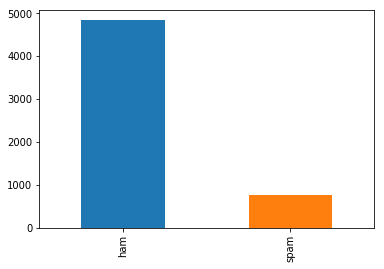

In [6]:
df.label.value_counts().plot(kind="bar")

So we have WAY more ham messages than we do spam. Because this is a
classification problem, it will be very useful to know our null accuracy rate which is
the percentage chance of predicting a single row correctly if we keep guessing the
most common class, ham:

In [7]:
df.label.value_counts() / df.shape[0]

ham     0.865937
spam    0.134063
Name: label, dtype: float64

So if we blindly guessed ham we would be correct about **87%** of the time, but we can
do better than that. If we have a set of classes, C, and a features xi, then we can use
Bayes theorem to predict the probability that a single row belongs to class C using
the following formula

$$
P(classC~|~{\rm {Xi} }) = \frac{P({\rm Xi}~|~classC)P(classC)}{P({\rm Xi})}
$$

Let's look at this formula in a little more detail:
- P(class C | {xi}): The posterior probability is the probability that the row
belongs to class C given the features {xi}.
- P({xi} | class C): This is the likelihood that we would observe these features
given that the row was in class C.
- P(class C): This is the prior probability. It is the probability that the data point
belongs to class C before we see any data.
- P({xi}): This is our normalization constant. 

For example, imagine we have an e-mail with three words: send cash now. We'll
use Naïve Bayes to classify the e-mail as either being **spam or ham**:

*P(spam| send cash now) = P(send cash now| spam) P(spam) / P(send cash now)*

*P(ham| send cash now) = P(send cash now| ham) P(ham) / P(send cash now)*

We are concerned with the difference of these two numbers. We can use the
following criteria to classify any single text sample:
- If P(spam | send cash now) is larger than P(ham | send cash now),
then we will classify the text as spam
- If P(ham | send cash now) is larger than P(spam | send cash now), then
we will label the text as ham

Because both equations have P (send money now) on the denominator, we can
ignore them.
So now we are concerned with the following:

**P(send cash now| spam) P(spam) VS P(send cash now| ham) P(ham)**

Let's figure out the numbers in this equation:
- P(spam) = 0.134063
- P(ham) = 0.865937
- P(send cash now | spam)
- P(send cash now | ham)

The final two likelihoods might seem like they would not be so difficult to calculate.
All we have to do is count the numbers of spam messages that include the phrase
send money now and divide that by the total number of spam messages:

In [9]:
df.msg = df.msg.apply(lambda x:x.lower())
# make all strings lower case so we can search easier

df[df.msg.str.contains('send cash now')] .shape

(0, 2)

Oh no! There are none! There are literally 0 texts with the exact phrase send cash
now. The hidden problem here is that this phrase is very specific and we can't assume
that we will have enough data in the world to have seen this exact phrase many
times before. Instead we can make a naïve assumption in our Bayes theorem. If we
assume that the features (words) are conditionally independent (meaning that no
word affects the existence of another word) then we can rewrite the formula:

**P(send cash now| spam) = P(send | spam) P(cash | spam) P(now| spam)**

In [13]:
spams = df[df.label == 'spam']
for word in ['send', 'cash', 'now']:
    print word, spams[spams.msg.str.contains(word)].shape[0] / float(spams.shape[0])revealing

SyntaxError: invalid syntax (<ipython-input-13-ede449ab591f>, line 3)

- P(send|spam) = 0.096
- P(cash |spam) = 0.091
- P(now|spam) = 0.280

Meaning we can calculate the following:

**P(send cash now| spam) P(spam)= (.096.091.280).134 = 0.00032**

Repeating the same procedure for ham gives us the following:

- P(send|ham) = 0.03
- P(cash|ham) = 0.003
- P(now|ham) = 0.109

**P(send cash now| ham) P(ham)= (.03.003.109).865 = 0.0000084**

The fact that these numbers are both very low is not as important as the fact that
the spam probability is much larger than the ham calculation. If we calculate .00032
/ .0000084 = 38.1 we see that the send cash now probability for spam is 38 times
higher than for spam.

Doing this means that we can classify send cash now as spam! Simple, right?

Let's use Python to implement a Naïve Bayes classifier without having to do all of
these calculations ourselves.

First, let's revisit the count vectorizer in scikit-learn that turns text into numerical
data for us. Let's assume that we will train on three documents (sentences):

In [14]:
# simple count vectorizer example
from sklearn.feature_extraction.text import CountVectorizer
# start with a simple example
train_simple = ['call you tonight','Call me a cab','please call me... PLEASE 44!']

# learn the 'vocabulary' of the training data
vect = CountVectorizer()
train_simple_dtm = vect.fit_transform(train_simple)
pd.DataFrame(train_simple_dtm.toarray(), columns=vect.get_feature_names())

,44,cab,call,me,please,tonight,you
0,0,0,1,0,0,1,1
1,0,1,1,1,0,0,0
2,1,0,1,1,2,0,0


Note that each row represents one of the three documents (sentences), each column
represents one of the words present in the documents and each cell contains the
number of times each word appears in each document.

We can then use the count vectorizer to transform new incoming test documents to
conform with our training set (the three sentences):

In [15]:
# transform testing data into a document-term matrix (using existing vocabulary, notice don't is missing)
test_simple = ["please don't call me"]
test_simple_dtm = vect.transform(test_simple)
test_simple_dtm.toarray()
pd.DataFrame(test_simple_dtm.toarray(), columns=vect.get_feature_names())

,44,cab,call,me,please,tonight,you
0,0,0,1,1,1,0,0


Note how in our test sentence we had a new word, namely don't. When we
vectorized it, because we hadn't seen that word previously in our training data, the
vectorizer simply ignored it. This is important, and incentivizes data scientists to
obtain as much data as possible for their training sets.


Now let's do this for our actual data:

In [17]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.msg, df.label, random_state=1)

# instantiate the vectorizer
vect = CountVectorizer()

# learn vocabulary and create document-term matrix in a single step
train_dtm = vect.fit_transform(X_train)
train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

With 55209 stored elements in compressed sparse row format.


Note that the format is in a sparse matrix, meaning the matrix is so large and full of
zeroes, there exists a special format to deal with objects such as this. Take a look at
the number of columns.


7,456 words!!

This means that in our training set, there are 7,456 unique words to look at. We can
now transform our test data to conform to our vocabulary:

In [18]:
# transform testing data into a document-term matrix
test_dtm = vect.transform(X_test)
test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

With 17604 stored elements in compressed sparse row format.
N
ote that we have the same exact number of columns because it is conforming to our
test set to be exactly the same vocabulary as before. No more, no less.

Now let's build a Naïve Bayes model (similar to the linear regression process):

In [19]:
## MODEL BUILDING WITH NAIVE BAYES
# train a Naive Bayes model using train_dtm
from sklearn.naive_bayes import MultinomialNB
# import our model

nb = MultinomialNB()
# instantiate our model

nb.fit(train_dtm, y_train)
# fit it to our training set

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Now the variable nb holds our fitted model. The training phase of the model
involves computing the likelihood function, which is the conditional probability of
each feature given each class:

In [20]:
# make predictions on test data using test_dtm
preds = nb.predict(test_dtm)

preds

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

The prediction phase of the model involves computing the posterior probability
of each class given the observed features, and choosing the class with the highest
probability.


We will use sklearn's built-in accuracy and confusion matrix to look at how well our
Naïve Bayes models are performing:

In [22]:
# compare predictions to true labels
from sklearn import metrics
print metrics.accuracy_score(y_test, preds)
print metrics.confusion_matrix(y_test, preds)

SyntaxError: invalid syntax (<ipython-input-22-3c2407e9dd05>, line 3)

accuracy == 0.988513998564

confusion matrix ==
[[1203 5]
[ 11 174]]

First off, our accuracy is great! Compared to our null accuracy which was 87%, 99%
is a fantastic improvement.


Now to our confusion matrix. From before, we know that each row represents
actual values while columns represent predicted values so the top left value, 1,203,
represents our true negatives. But what is negative and positive? We gave the model
the strings spam and ham as our classes, not positive and negative.


We can use the following:

In [24]:
nb.classes_

array(['ham', 'spam'], dtype='<U4')

We can then line up the indices so that the 1,203 refers to true ham predictions and
174 refers to true spam predictions.

There were also five false spam classifications, meaning that five messages were
predicted as spam, but were actually ham, as well as 11 false ham classifications.

In summary, Naïve Bayes classification uses Bayes theorem in order to fit posterior
probabilities of classes so that data points are correctly labeled as belonging to the
proper class.

here is an intersting clip to watch on YOUTUBE 

https://www.youtube.com/watch?v=CPqOCI0ahss